#### Multi-layer Perceptron regressor

sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [3]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

mlp = MLPRegressor(
    hidden_layer_sizes=(100, ),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=0,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10)

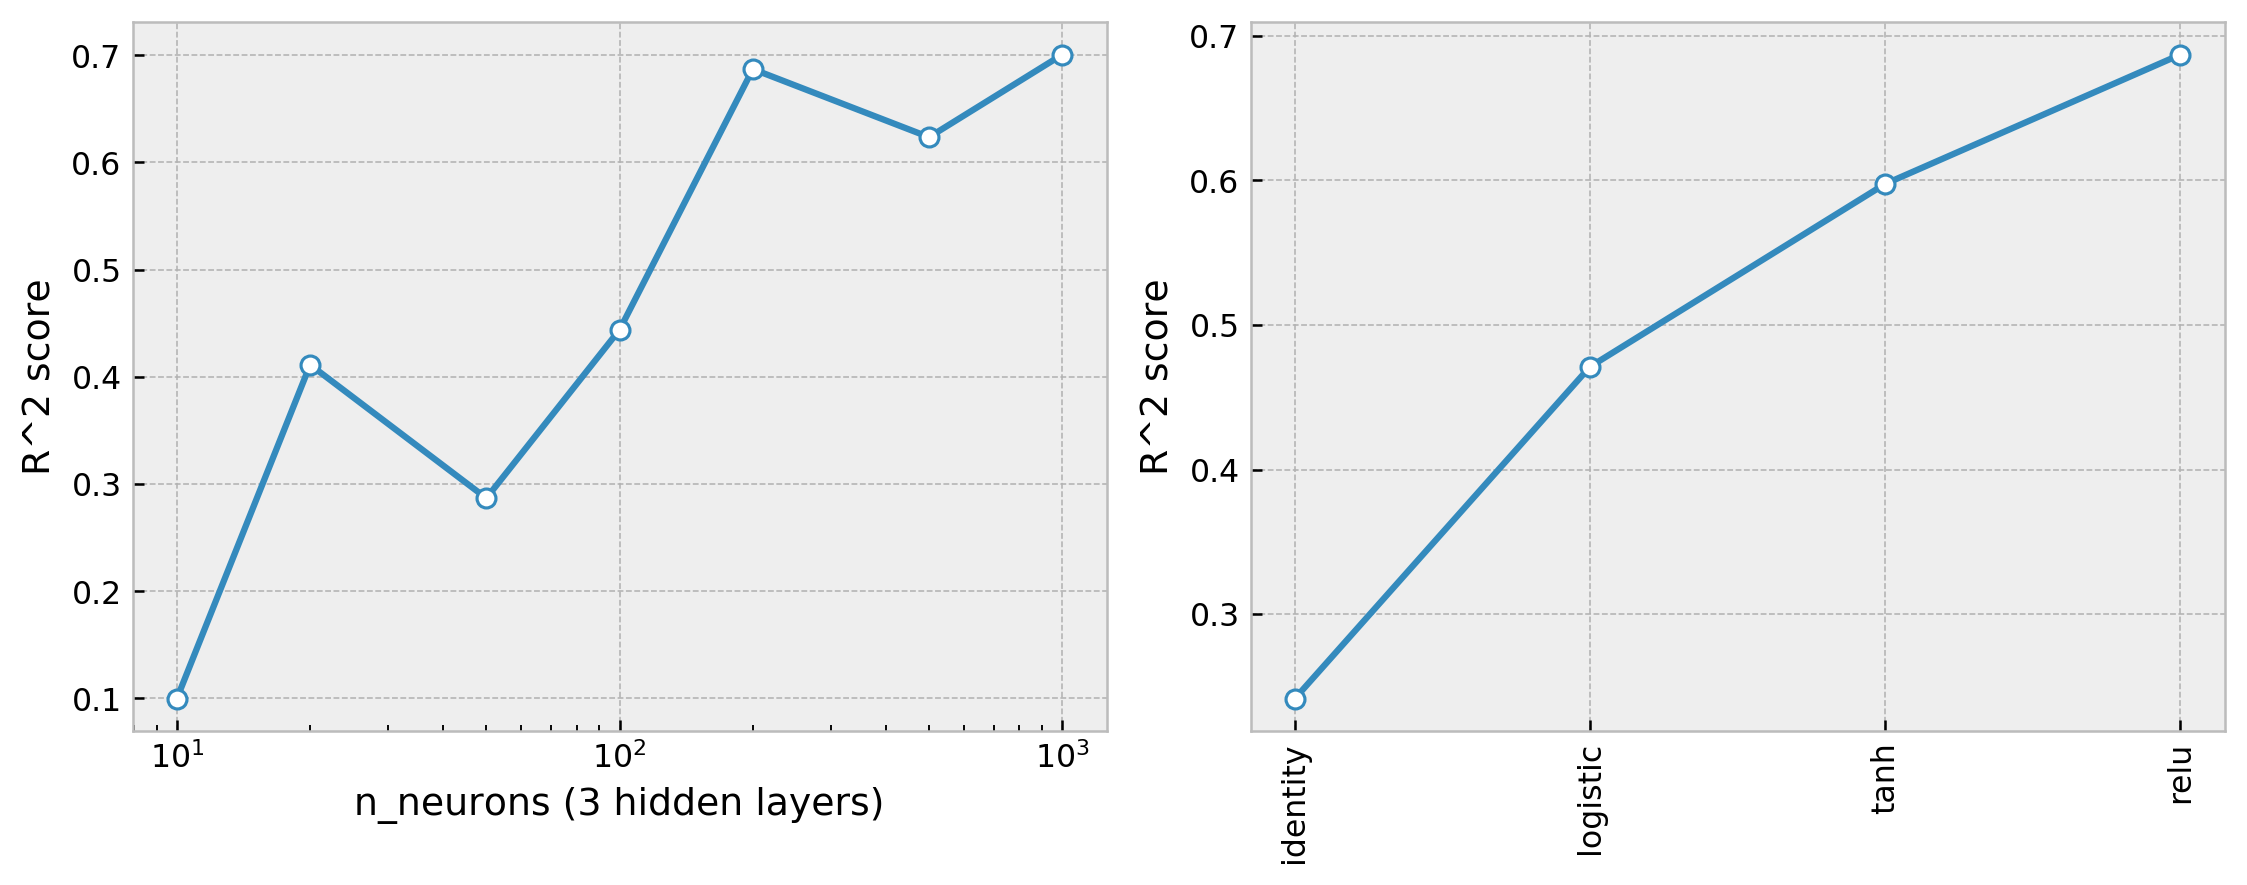

In [4]:
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))

n_neurons = [10, 20, 50, 100, 200, 500, 1000]
R2 = []
for n_neuron in n_neurons:
    mlp = MLPRegressor(hidden_layer_sizes=(n_neuron, n_neuron, n_neuron), random_state=0)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    R2.append(r2_score(y_test, y_pred))
    
axes[0].plot(n_neurons, R2, marker='o', mfc='w')
axes[0].set_xlabel('n_neurons (3 hidden layers)')
axes[0].set_ylabel('R^2 score')
axes[0].set_xscale('log')

activations = ['identity', 'logistic', 'tanh', 'relu']
R2 = []
for activation in activations:
    mlp = MLPRegressor(hidden_layer_sizes=(200, 200, 200), activation=activation, random_state=0)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    R2.append(r2_score(y_test, y_pred))
axes[1].plot(np.arange(len(activations)), R2, marker='o', mfc='w')
axes[1].set_ylabel('R^2 score')
axes[1].set_xticks(np.arange(len(activations)))
axes[1].set_xticklabels(activations, {'rotation': 90})
plt.tight_layout()

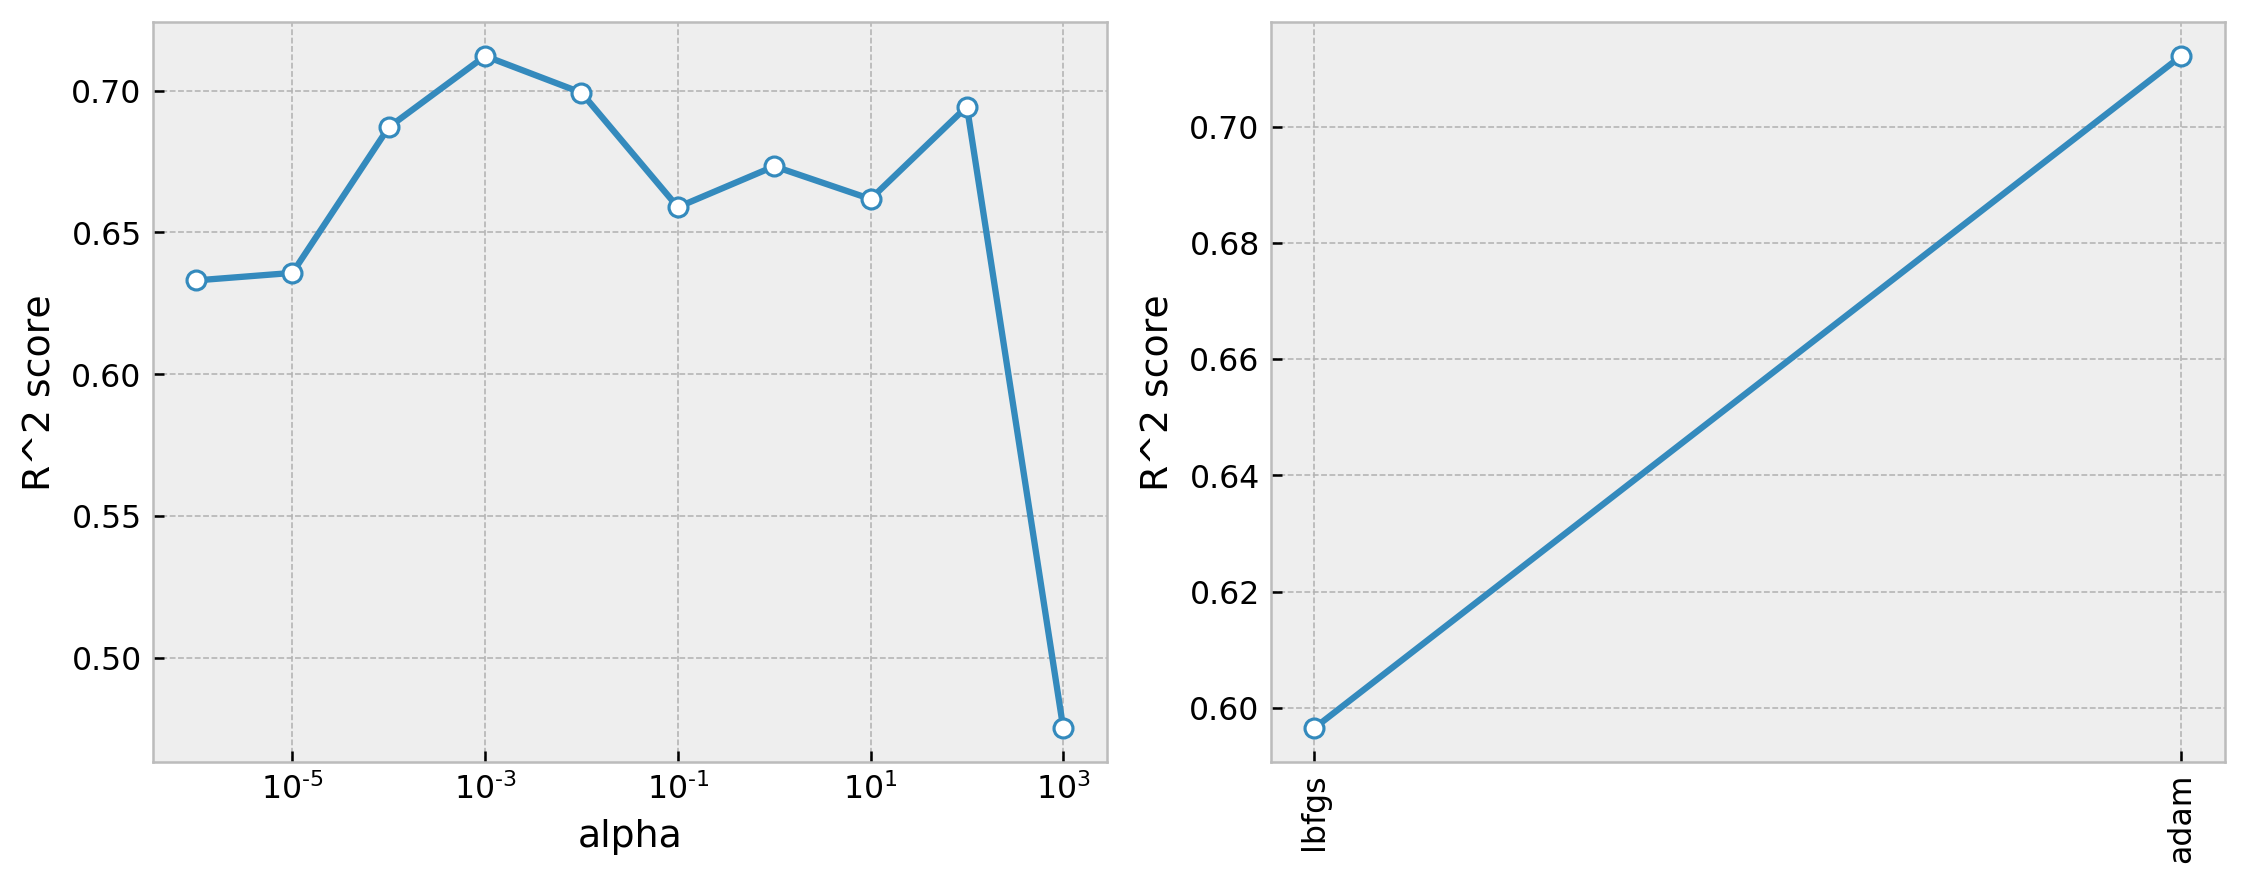

In [5]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))

alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
R2 = []
for alpha in alphas:
    mlp = MLPRegressor(hidden_layer_sizes=(200, 200, 200), alpha=alpha, random_state=0)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    R2.append(r2_score(y_test, y_pred))
    
axes[0].plot(alphas, R2, marker='o', mfc='w')
axes[0].set_xlabel('alpha')
axes[0].set_ylabel('R^2 score')
axes[0].set_xscale('log')

# solvers = ['lbfgs', 'sgd', 'adam']
solvers = ['lbfgs', 'adam']
R2 = []
for solver in solvers:
    mlp = MLPRegressor(hidden_layer_sizes=(200, 200, 200), alpha=1e-3, solver=solver, random_state=0)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    R2.append(r2_score(y_test, y_pred))
axes[1].plot(np.arange(len(solvers)), R2, marker='o', mfc='w')
axes[1].set_ylabel('R^2 score')
axes[1].set_xticks(np.arange(len(solvers)))
axes[1].set_xticklabels(solvers, {'rotation': 90})
plt.tight_layout()

In [6]:
mlp = MLPRegressor(
    hidden_layer_sizes=(200, 200, 200), alpha=1e-3,
    activation='relu', solver='adam', random_state=0)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(f"R^2 score = {r2_score(y_test, y_pred):.3f}")

R^2 score = 0.712
